# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Desc**: 
No-Show Appointmnet data has been analysed for following questions :

> a) Does Age or Gender has some impact on No show of the patients
  
> b) Does sms recieved has any impact on the patients ?
  
> c) Whether time gap between scheduled date and appointment date impacts No Show?	


In [70]:
import pandas as pd
import numpy as np
import datetime 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


### Function 

In [71]:
# This function converts the values to datetime object 

def convertToDateTime(df,colname):
    df[colname] = df[colname].apply(np.datetime64)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [72]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
# Data Sanity Checking
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

### Plotting Correlation for Multivariate Analysis

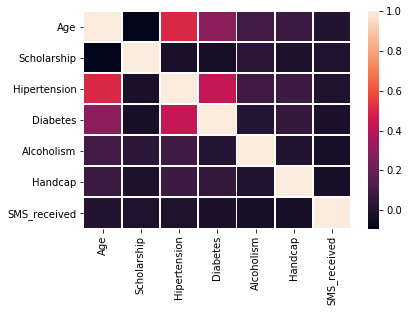

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.drop(['PatientId','AppointmentID'],axis=1).corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=1)
plt.show()

### Conclusion 

> **Conclusion** :
From the above plotted correraltion graph, we can clearly see that most of the cell are darker (close to 0), i.e., they are not correalted. 



### Data Sanity and Cleaning 

> **Desc**: 

> a) Removing anamolies from age variable like -1 and 0 and excluding the values more than 100
  
> b) Checking the data type of each variables
  
> c) Check for null values and duplicate values.


In [76]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.Age.unique())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
0
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [77]:
df = df[df['Age'] > 0]
df = df[df['Age'] < 100]

In [78]:
# convert the Appointment day and Schedule Day to DateTime object
convertToDateTime(df,'AppointmentDay')
convertToDateTime(df,'ScheduledDay')

df['TimeGap'] = (df.AppointmentDay - df.ScheduledDay).dt.days

In [79]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeGap
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


In [80]:
df.TimeGap.unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        72,  63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,
        68,  75,  88,  80,  78,  53,  67,  74,  84, 111,  -2,  79,  85,
        97,  93,  82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89,
       150, 125, 126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122])

In [81]:
df = df[df.TimeGap >= 0]

In [82]:
df.TimeGap.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

In [83]:
# WHEN NO SHOW is 0 then Yes (its a show) 
df['No-show']= df['No-show'].apply(lambda x: 0 if x =="Yes" else 1)

In [84]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeGap
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,1


In [85]:
df.shape

(69819, 15)


# Exploratory Data Analysis On 3 variables

## Age, Gender, SMS_received has any impact on No Show ?

### Analysis on Age 

> **Desc**: 
To analyze Age it was binned into groups to see the distribution by plotting histogram. According to observation maximum patients belong to 50-60 age group. 
Also, to dive more into the analysis, the dataframe was sub divided into no show dataframe. 

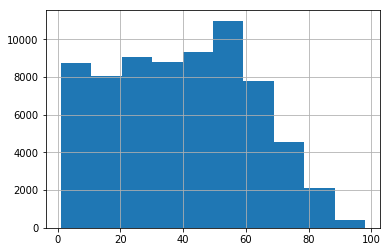

In [86]:
import matplotlib as plt
%matplotlib inline 

df.Age.hist()

In [87]:
buckets = ["0-10", "10-20", "20-30", "30-40","40-50", "50-60", "60-70", "70-80","80-90", "90-100"]
df_age_buckets = pd.cut(df.Age, [0, 10,20,30,40,50,60,70,80,90,100], labels=buckets)

df_age_buckets
df_age_buckets = pd.value_counts(df_age_buckets).sort_values(ascending=False)

dfNoShow = df[df['No-show'] == 0]

In [88]:
buckets = ["0-10", "10-20", "20-30", "30-40","40-50", "50-60", "60-70", "70-80","80-90", "90-100"]
df_age_buckets_No_show = pd.cut(dfNoShow.Age, [0, 10,20,30,40,50,60,70,80,90,100], labels=buckets)

df_age_buckets_No_show
df_age_buckets_No_show = pd.value_counts(df_age_buckets_No_show).sort_values(ascending=False)

In [89]:
df_age_buckets_No_show = pd.DataFrame(df_age_buckets_No_show)
df_age_buckets_No_show['bucket'] = df_age_buckets_No_show.index
df_age_buckets_No_show.reset_index(level=0, inplace=True)
#df_age_buckets_No_show.drop('index',inplace=True)
df_age_buckets_No_show.rename(columns={'0': 'count'})

df_age_buckets_No_show.rename(columns={'Age': 'count'})

,index,count,bucket
0,20-30,3175,20-30
1,30-40,3060,30-40
2,10-20,2826,10-20
3,0-10,2793,0-10
4,40-50,2697,40-50
5,50-60,2550,50-60
6,60-70,1552,60-70
7,70-80,837,70-80
8,80-90,387,80-90
9,90-100,54,90-100


In [90]:
df_age_buckets = pd.DataFrame(df_age_buckets)
df_age_buckets = df_age_buckets.rename(columns={0: 'count'})
df_age_buckets['bucket'] = df_age_buckets.index
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [91]:
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [92]:
df_age_buckets.head()

,Age,bucket
50-60,10868,50-60
30-40,9713,30-40
40-50,9568,40-50
20-30,9051,20-30
0-10,8757,0-10


In [93]:
#df_age_buckets_No_show.rename(columns={'Age': 'count'},inplace=True)

In [94]:
df_age_buckets_No_show
#df_age_buckets_No_show.drop('bucket',axis=1,inplace=True)

,index,Age,bucket
0,20-30,3175,20-30
1,30-40,3060,30-40
2,10-20,2826,10-20
3,0-10,2793,0-10
4,40-50,2697,40-50
5,50-60,2550,50-60
6,60-70,1552,60-70
7,70-80,837,70-80
8,80-90,387,80-90
9,90-100,54,90-100


In [95]:
df_age_buckets.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 10 entries, 50-60 to 90-100
Data columns (total 2 columns):
Age       10 non-null int64
bucket    10 non-null category
dtypes: category(1), int64(1)
memory usage: 900.0 bytes


In [96]:
df_age_buckets_No_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
index     10 non-null category
Age       10 non-null int64
bucket    10 non-null category
dtypes: category(2), int64(1)
memory usage: 980.0 bytes


In [97]:
df_age_buckets.bucket = df_age_buckets.bucket.astype(str)
df_age_buckets_No_show.bucket = df_age_buckets_No_show.bucket.astype(str)

In [98]:
df_age_buckets.rename(columns={'Age': 'count'},inplace=True)
df_age_buckets_No_show.rename(columns={'Age': 'count'},inplace=True)

df_age_buckets_No_show = df_age_buckets_No_show.sort_values('bucket')
df_age_buckets = df_age_buckets.sort_values('bucket')

In [99]:
df_join = df_age_buckets_No_show.join(df_age_buckets,on='bucket',how='inner',rsuffix='_r')

df_join['Per'] = df_join['count_r']/df_join['count']*100
df_join.sort_values('Per',inplace=True)

col = ['index','bucket_r','count','count_r']
df_final = df_join.drop(col,axis=1)

df_final

,bucket,Per
2,10-20,284.005662
0,20-30,285.070866
3,0-10,313.533835
1,30-40,317.418301
4,40-50,354.764553
9,90-100,357.407407
5,50-60,426.196078
8,80-90,445.219638
7,70-80,480.525687
6,60-70,508.891753


### Conclusion for Analysis on Age 

> **Conclusion**: 
The Age Analysis was performed on No-Show dataset to see if any particular age group has more no-show. However, it has been observed that older people has less no-show where as younger ones has more no-show.   
    

### Gender Analysis


> **Desc**: 
From exploratory data analysis, it has been seen that female patients are approx.50% more than the male patients. Thus, the distribution of No-Show across gender makes less sense as per the below analysis.

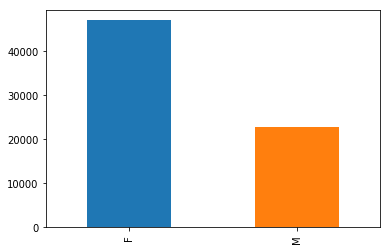

In [100]:
df.Gender.value_counts().plot(kind="bar")

In [101]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeGap
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,0,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,1,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,1


In [102]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [103]:
len(df[df.Gender == "F"])

47023

In [104]:
len(df[df.Gender == "M"])

22796

In [105]:
# Females that didn't show up
len(df[(df.Gender == "F") & (df['No-show'] == 0) ])

13377

In [106]:
# Males that didn't show up
len(df[(df.Gender == "M") & (df['No-show'] == 0) ])

6554

In [107]:
# Percentage of Females that didn't show up
len(df[(df.Gender == "F") & (df['No-show'] == 0) ]) / len(df[df.Gender == "F"]) * 100

28.447780873189714

In [108]:
# Percentage Males that didn't show up
len(df[(df.Gender == "M") & (df['No-show'] == 0) ]) / len(df[df.Gender == "M"]) * 100

28.750658010177222

### SMS Recieved Analysis


> **Desc**: 
> To check whether a patient who has received an sms would show or not, the analysis was performed on the data with only no-show rows. 


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69819 entries, 5 to 110526
Data columns (total 15 columns):
PatientId         69819 non-null float64
AppointmentID     69819 non-null int64
Gender            69819 non-null object
ScheduledDay      69819 non-null datetime64[ns]
AppointmentDay    69819 non-null datetime64[ns]
Age               69819 non-null int64
Neighbourhood     69819 non-null object
Scholarship       69819 non-null int64
Hipertension      69819 non-null int64
Diabetes          69819 non-null int64
Alcoholism        69819 non-null int64
Handcap           69819 non-null int64
SMS_received      69819 non-null int64
No-show           69819 non-null int64
TimeGap           69819 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), object(2)
memory usage: 8.5+ MB


In [110]:
dfNoShow.groupby('SMS_received')['No-show'].count()

SMS_received
0    10363
1     9568
Name: No-show, dtype: int64

Text(0, 0.5, 'Count')

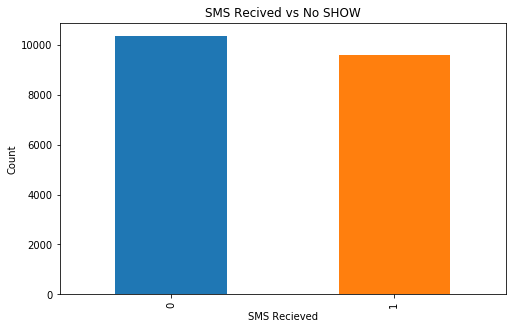

In [111]:
sms_rcvd = dfNoShow.groupby('SMS_received')['No-show'].count().plot(kind="bar",figsize=(8,5))
sms_rcvd.set_title("SMS Recived vs No SHOW")
sms_rcvd.set_xlabel("SMS Recieved")
sms_rcvd.set_ylabel("Count")

#### Conclusion for Analysis on SMS Recieved

> **Conclusion**:
It can be seen that patients who did not show up does not have a any significant difference whether they have received an sms or not as population is almost same. 

## Does time duration between the ScheduledDay and AppointmentDay  play a factor in no show ?

### Time Gap Analysis


> **Desc**: 
In order to analyse the ques, Time Gap by subtracting Scheduled Day from Appointment Day has been derived. 

In [112]:
df.TimeGap.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

In [113]:
binss = [0,10,20,30,40,50,60,180]

df_timegap = pd.cut(dfNoShow['TimeGap'], bins=binss).value_counts().reset_index()
df_timegap.sort_values('index',inplace=True)


In [114]:
df_timegap

,index,TimeGap
0,"(0, 10]",8324
1,"(10, 20]",4510
2,"(20, 30]",2919
3,"(30, 40]",1641
4,"(40, 50]",577
6,"(50, 60]",337
5,"(60, 180]",548


Text(0, 0.5, 'Count')

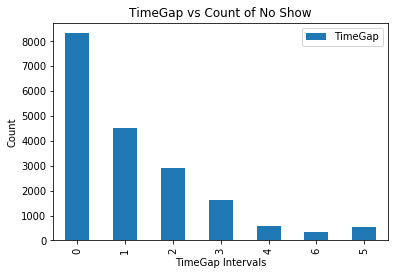

In [115]:
df_timegap_bar = df_timegap.plot(kind="bar")
df_timegap_bar.set_title("TimeGap vs Count of No Show")
df_timegap_bar.set_xlabel("TimeGap Intervals")
df_timegap_bar.set_ylabel("Count")

In [116]:
180/30

6.0

In [117]:
df.TimeGap.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  72,
        63,  19,  48,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  76,  68,
        75,  88,  80,  78,  53,  67,  74,  84, 111,  79,  85,  97,  93,
        82, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150, 125,
       126, 110, 118,  73,  70,  81, 102, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

#### Conclusion for Analysis on Time Gap

>**Conclusion**:

>This time gap has been further binned into groups and then distribution of no-show has been plotted with the help of the histogram. It has been clearly observed that people with less wait time of days have maximum no-show.

<a id='conclusions'></a>
# Overall Conclusions


> a)For question 1, it has been observed that people above the age of 60 has less no-shows as compared to other people. Also, from gender point of view, female and male patients have approx.equal percentage of no-show. Therefore, it may not prove to be an impactful variable.

> b)For question 2, sms received does not seem to change the precentage of no-show as it has been observed that percentage of people who receive an sms and do not show up is almost same as those who deos not receive.

> c)For question 3, it has been observed that people with less Time Gap of days have higher no-shows as compared to other people.


### LIMITATIONS and MISSING INFO

>A few Limitations of the data :

>1) The Distance between Neighbourhood Clinic and Paitent might be a good metrics to look on, which is missing in this dataset

>2) It would be interesting to know if there is a public transport near Clinic

>3) The data covers only 6 months of appointment, it does not cover year round appointments.

>4) The Gender data provided is skewed, a better balanced data would have been good.

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_Chaitanya.ipynb'])

0